## Thomas Schelling's Segregation Model

In 1971 Thomas Schelling published “Dynamic Models of Segregation,” which proposes a simple model of racial segregation. The Schelling model of the world is a grid; each cell represents a house. The houses are occupied by two kinds of “agents,” labeled red and blue, in roughly equal numbers. About 10% of the houses are empty.

At any point in time, an agent might be happy or unhappy, depending on the other agents in the neighborhood. The neighborhood of each house is the set of eight adjacent cells. In one version of the model, agents are happy if they have at least two neighbors like themselves, and unhappy if they have one or zero.

The simulation proceeds by choosing an agent at random and checking to see whether it is happy. If so, then nothing happens; if not, the agent chooses one of the unoccupied cells at random and moves.

Schelling demonstrated his model with coins on a chessboard. We get the privilege to use a computer! :)

The class below is one implementation of the basics of this simulation. (You are welcome to use mine, but you are also welcome to change it, or indeed make your own).

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
class City():

    def __init__(self, size, proportions, threshold):
        self.size = size        
        self.pop = np.random.choice([-1,0,1],p=proportions,size=(size,size))
        self.threshold = threshold
        
    def show(self):
        plt.imshow(self.pop, interpolation="nearest", cmap="bwr")
        plt.xticks([])
        plt.yticks([])
        plt.show()        
        
    def step(self):
        # pick random house
        i,j = self.randomHouse()
        # find a place to move to if it's unhappy
        if self.numberKin(i,j) < self.threshold:
            self.move(i,j)        
        
    def numberKin(self, i, j):
        return np.count_nonzero(self.pop[i-1:i+2,j-1:j+2]==self.pop[i,j])-1

    def move(self, i, j):
        newi,newj = self.randomVacant()
        self.pop[newi][newj] = self.pop[i][j]
        self.pop[i][j] = 0
        
    def randomHouse(self):
        found = False
        while not found:
            i = np.random.randint(1,self.size-1)
            j = np.random.randint(1,self.size-1)
            if self.pop[i][j] != 0:
                found = True
        return i, j

    def randomVacant(self):
        np.where(self.pop==0)
        found = False
        while not found:
            i = np.random.randint(1,self.size-1)
            j = np.random.randint(1,self.size-1)
            if self.pop[i][j] == 0:
                found = True
        return i, j
    
    def numberNeighbors(self, i, j):
        return np.count_nonzero(self.pop[i-1:i+2,j-1:j+2]!=0)-1    

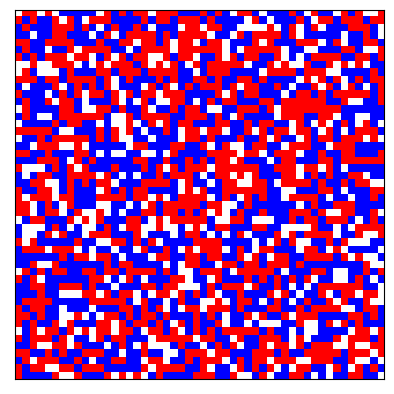

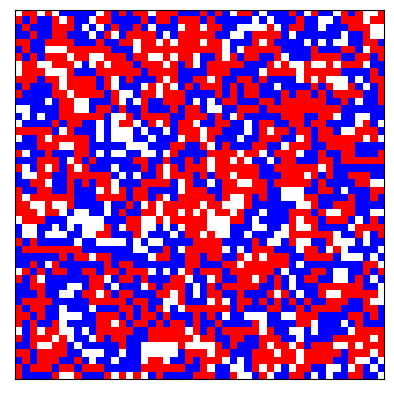

In [14]:
c = City(50,[0.4,0.2,0.4],2)
moves = 100000
c.show()
si = []
for i in range(moves):
    c.step()
c.show()